In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

In [4]:
df = pd.read_csv('data/pokemon.csv')
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,RealClusters
0,Bulbasaur,318,45,77.634658,50.854702,65,65,45,2
1,Ivysaur,405,60,67.454273,39.202323,80,80,60,1
2,Venusaur,525,80,76.007423,47.605846,100,100,80,2
3,VenusaurMega Venusaur,625,80,77.828031,50.744911,122,120,80,2
4,Charmander,309,39,68.658104,37.890027,60,50,65,1


In [5]:
X = df[['Attack', 'Defense']]

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

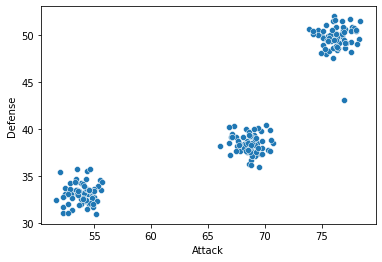

In [7]:
sns.scatterplot(data=df, x='Attack', y='Defense')

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

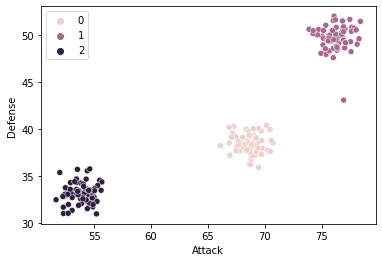

In [8]:
# инициализируем алгоритм k-means с количеством кластеров 3
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
# запустим обучение модели
kmeans.fit(X)
# предскажем, к какому кластеру принадлежат покемоны 
predictions = kmeans.predict(X)
# если мы хотим получить метки класса для тех же данных, на которых обучили модель, можно запросить labels
predictions = kmeans.labels_

# сохраним предсказания в датафрейм
df['Clusters_k3'] = predictions

sns.scatterplot(data=df, x='Attack', y='Defense', hue=predictions)


In [9]:
X = df[['Attack', 'Defense', 'Speed']]

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42, n_init=10)

kmeans.fit(X)

predictions = kmeans.predict(X)
print(predictions)
predictions = kmeans.labels_
print(predictions)


[0 2 2 2 2 2 1 1 1 0 2 2 2 2 0 0 2 1 2 1 1 1 2 2 2 2 1 1 1 0 0 2 0 2 0 2 0
 2 2 2 1 2 2 1 1 2 2 2 2 2 1 0 2 2 2 2 1 0 2 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2
 0 2 1 1 1 2 1 1 1 0 2 2 0 0 2 0 0 2 0 2 2 1 2 0 2 2 2 1 2 2 0 0 0 0 0 2 2
 2 2 2 0 0 2 2 2 1 1 0 0 2 2 1 0 0 2 2 1 1 1 0 1 0 0 0 2 1 0 0 2 0 0 1 1 1
 2 1 1 1 2 1 0 2 2 0 2 2 1 2 1 2 1 2 2 2 2 1 0 1 1 0 2 2 0 2 1 0 0 0 2 0 0
 2 1 1 1 0 2 2 2 1 2 1 1 1 1 2 1 2 2 0 2 2]
[0 2 2 2 2 2 1 1 1 0 2 2 2 2 0 0 2 1 2 1 1 1 2 2 2 2 1 1 1 0 0 2 0 2 0 2 0
 2 2 2 1 2 2 1 1 2 2 2 2 2 1 0 2 2 2 2 1 0 2 2 2 0 0 0 2 1 0 0 0 1 0 0 0 2
 0 2 1 1 1 2 1 1 1 0 2 2 0 0 2 0 0 2 0 2 2 1 2 0 2 2 2 1 2 2 0 0 0 0 0 2 2
 2 2 2 0 0 2 2 2 1 1 0 0 2 2 1 0 0 2 2 1 1 1 0 1 0 0 0 2 1 0 0 2 0 0 1 1 1
 2 1 1 1 2 1 0 2 2 0 2 2 1 2 1 2 1 2 2 2 2 1 0 1 1 0 2 2 0 2 1 0 0 0 2 0 0
 2 1 1 1 0 2 2 2 1 2 1 1 1 1 2 1 2 2 0 2 2]


EM-КЛАСТЕРИЗАЦИЯ

In [10]:
from sklearn.mixture import GaussianMixture

In [15]:
X = df[['Attack', 'Defense']]
gm = GaussianMixture(
    n_components=3,
    random_state=42
)

gm.fit(X)
gm_prediction = gm.predict(X)

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

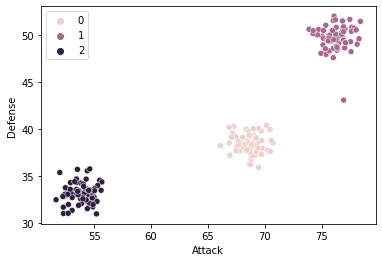

In [16]:
sns.scatterplot(data=df, x='Attack', y='Defense', hue=gm_prediction)

In [17]:
from sklearn.cluster import SpectralClustering

In [19]:
spect_clust = SpectralClustering(n_clusters=3, random_state=42)
spect_clust.fit(X)
predictions = spect_clust.labels_

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

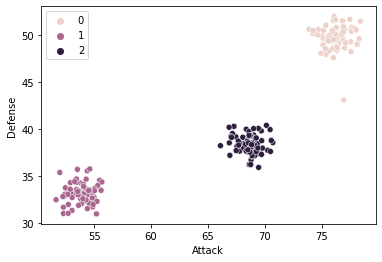

In [21]:
sns.scatterplot(data=df, x='Attack', y='Defense', hue=predictions)

In [22]:
from sklearn.cluster import DBSCAN

<AxesSubplot:xlabel='Attack', ylabel='Defense'>

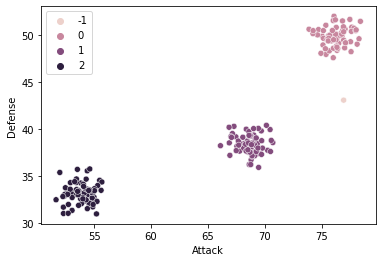

In [24]:
dbs = DBSCAN(eps=3, min_samples=3)
dbs.fit(X)
predictions = dbs.labels_

sns.scatterplot(data=df, x='Attack', y='Defense', hue=predictions)